In [2]:
# Notebook 5\5

In [3]:
import pandas as pd

def check_and_adjust_column(df, column_name, epsilon=1e-10):
    """ 
    Purpose: To inspect and adjust a DataFrame column for specific issues such as
    zeros, negative values, and missing (NaN) values.
    """
    column = df[column_name]
    
    # Check for zeros, negatives, and NaNs
    count_zeros = (column == 0).sum()
    count_negatives = (column < 0).sum()
    count_nans = column.isna().sum()
    
    # Adjust values
    if count_zeros > 0:
        df[column_name] = column.replace(0, epsilon)
    if count_negatives > 0:
        df[column_name] = df[column_name].clip(lower=epsilon)
    
    # Return counts
    return count_zeros, count_negatives, count_nans

def recheck_and_print(df, epsilon=1e-10):
    """ Recheck columns after adjustment and print the results. """
    results = {}
    
    # Select only numeric columns
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Check if there are any numeric columns
    if len(numeric_columns) == 0:
        print("No numeric columns found in the DataFrame.")
        return

    for col in numeric_columns:
        count_zeros, count_negatives, count_nans = check_and_adjust_column(df, col, epsilon)
        results[col] = {
            'zeros': count_zeros,
            'negatives': count_negatives,
            'nans': count_nans
        }
    
    # Print the results
    for column, counts in results.items():
        print(f"Column: {column}")
        print(f"  Zeros treated: {counts['zeros']}")
        print(f"  Negatives treated: {counts['negatives']}")
        print(f"  NaNs: {counts['nans']}")
        print()

    # If no issues were found in any column, print a message
    if all(count['zeros'] == 0 and count['negatives'] == 0 and count['nans'] == 0 for count in results.values()):
        print("No zeros, negatives, or NaNs were found in any numeric columns.")

# Example usage
# df = pd.DataFrame({...})
# recheck_and_print(df)


In [4]:
def print_values_at_positions(df, column_name, row_positions):
    """
    Prints the values from a specified column at the given row positions.
    
    Parameters:
    - df: The DataFrame containing the data.
    - column_name: The name of the column from which to retrieve the values.
    - row_positions: A list of row indices (integer positions) to retrieve values from.
    """
    # Retrieve and print the values at the specified positions
    values = df.iloc[row_positions][column_name]
    print(f"Values from '{column_name}':")
    for pos, value in zip(row_positions, values):
        print(f"  Row Index: {pos}, Value: {value}")
    print()

In [5]:
import pandas as pd
import numpy as np

def print_nan_positions(df):
    """
    This function prints the column names and positions (row indices) of NaN values in a DataFrame.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame to inspect.
    """
    # Iterate over columns
    for column in df.columns:
        # Find indices of NaN values in the current column
        nan_indices = df[column].index[df[column].isna()]
        
        # Print the column name and positions of NaN values
        if not nan_indices.empty:
            print(f"Column: {column}")
            for index in nan_indices:
                print(f"  Row Index: {index}")
            print()  # Add a blank line for better readability




In [6]:
import json
import pandas as pd

def load_csv_with_dtype(csv_file: str, dtype_json_file: str) -> pd.DataFrame:
    """
    Load a CSV file using data types specified in a JSON file.

    Parameters:
    csv_file (str): The path to the CSV file to load.
    dtype_json_file (str): The path to the JSON file containing the data types.

    Returns:
    pd.DataFrame: A DataFrame with the correct data types.
    """
    # Load the JSON file with data types
    with open(dtype_json_file, 'r') as json_file:
        dtype_dict = json.load(json_file)

    # Load the CSV file using the data types from the JSON
    df = pd.read_csv(csv_file, dtype=dtype_dict)

    # Verify the data types (optional, can be removed if not needed)
    print(df.dtypes)

    return df


In [7]:
from sklearn.model_selection import train_test_split

def prepare_data(df: pd.DataFrame, target_column: str):
    """
    Prepare data by splitting into features and target, then into training and test sets.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    target_column (str): The name of the target column.
    
    Returns:
    pd.DataFrame: X_train, X_test, Y_train, Y_test
    """
    X = df.drop(columns=[target_column])
    Y = df[target_column]
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    
    return X_train, X_test, Y_train, Y_test

In [8]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor  # Ensure this import is included

def define_models():
    """
    Define a dictionary of models to train.
    
    Returns:
    dict: A dictionary where keys are model names and values are model instances.
    """
    models = {
        'RandomForest': RandomForestRegressor(),
        'LinearRegression': LinearRegression(),
        'SVR': SVR(),
        'GradientBoosting': GradientBoostingRegressor(),        
        'DecisionTree': DecisionTreeRegressor()  # Added Decision Tree model
    }
    
    return models


In [9]:
def fit_model(model_name: str, model, X_train: pd.DataFrame, Y_train: pd.Series):
    """
    Fit a model on the training data.
    
    Parameters:
    model_name (str): The name of the model.
    model: The model instance to fit.
    X_train (pd.DataFrame): The training features.
    Y_train (pd.Series): The training target.
    
    Returns:
    tuple: A tuple containing the model name and the fitted model.
    """
    model.fit(X_train, Y_train)
    return model_name, model


In [10]:
from joblib import Parallel, delayed

def train_models_in_parallel(models: dict, X_train: pd.DataFrame, Y_train: pd.Series):
    """
    Train multiple models in parallel.
    Purpose: To fit each model in the models dictionary using the training data (X_train, Y_train) in parallel.
    Benefit: This approach speeds up the training process by utilizing multiple CPU cores. Instead of training each model sequentially, all models are trained concurrently.


    Pipeline: In scikit-learn, a pipeline is used to sequentially apply a list of transformations and a final estimator. It ensures that all steps are applied consistently during training and testing, making it easier to manage and reproduce workflows.
    Parallel Processing: The code snippet you provided uses joblib.Parallel to fit multiple models in parallel. This approach is focused on speeding up the training process by utilizing multiple CPU cores to run tasks concurrently.


    n_jobs=-1 - details:
    The n_jobs parameter is used in various scikit-learn functions and other parallel computing libraries to specify the number of parallel jobs or threads to use for computation
    Description: Use all available CPU cores. This is the most common setting for parallel computation as it maximizes resource utilization.
    Use Case: Ideal when you want to leverage the full power of your machine for faster computation.
    Parameters:
    
    models (dict): A dictionary of model names and instances.
    X_train (pd.DataFrame): The training features.
    Y_train (pd.Series): The training target.
    
    Returns:
    dict: A dictionary of trained models.
    """

    # Print the entire dictionary
    print("Models dictionary:")
    for model_name, model_instance in models.items():
        print(f"Model Name: {model_name}")
        print(f"Model Instance: {model_instance}")
        print()  # Print a newline for better readability

    
    fitted_models = Parallel(n_jobs=-1)(
        delayed(fit_model)(model_name, model, X_train, Y_train)
        for model_name, model in models.items()
    )
    
    return dict(fitted_models)


In [11]:
def add_model_to_dict(models_dict: dict, model_name: str, model):
    """label
    Add a fitted model to the models dictionary.
    
    Parameters:
    models_dict (dict): The dictionary where models are stored.
    model_name (str): The name of the model to add.
    model: The fitted model to add.
    
    Returns:
    dict: The updated dictionary with the new model added.
    """
    models_dict[model_name] = model
    return models_dict


In [12]:
# import os
# import joblib

# def evaluate_and_save_models(models_dict, save_path='models'):
#     """
#     Evaluate models and save them to disk.
    
#     Args:
#         models_dict (dict): A dictionary of trained models.
#         save_path (str): The directory path where models will be saved.
#     """
#     # Create the directory if it doesn't exist
#     os.makedirs(save_path, exist_ok=True)
    
#     for model_name, model in models_dict.items():
#         # Save the model
#         joblib.dump(model, f"{save_path}/{model_name}_model.pkl")
#         print(f"Model {model_name} saved to {save_path}/{model_name}_model.pkl")


In [13]:
import os
import joblib
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def debug_print(message):
    """Print debug messages."""
    print(message)

def evaluate_and_save_models(models_dict, X_test, y_test, target_type, save_path):
    """
    Evaluate models and save them to disk. Debugging included for tracking issues.
    
    Args:
        models_dict (dict): A dictionary of trained models.
        X_test (pd.DataFrame or np.ndarray): The test features.
        y_test (pd.Series or np.ndarray): The true labels for the test set.
        target_type (str): The type of target ('continuous' or other).
        save_path (str): The directory path where models will be saved.
        
    Returns:
        pd.DataFrame: A DataFrame containing evaluation results.
    """
    # Create the directory if it doesn't exist
    os.makedirs(save_path, exist_ok=True)
    
    results = []
    
    def evaluate_continuous_model(y_test, y_pred, model_name):
        """
        Evaluate the performance of a continuous regression model using various metrics.

        Parameters:
        - y_test: array-like, true target values
        - y_pred: array-like, predicted values from the model
        - model_name: str, name of the model being evaluated

        Returns:
        - dict: Evaluation metrics for the model
        """
        # Calculate evaluation metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Print evaluation metrics
        print(f"Model: {model_name}")
        print(f"Mean Squared Error (MSE): {mse:.4f}")
        print(f"Mean Absolute Error (MAE): {mae:.4f}")
        print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
        print(f"R-squared (R²): {r2:.4f}")

        # Return metrics as a dictionary
        return {
            'Model': model_name,
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'R2': r2
        }

    for model_name, model in models_dict.items():
        try:
            debug_print(f"Evaluating model: {model_name}")
            
            # Ensure X_test is numeric
            if isinstance(X_test, pd.DataFrame):
                X_test = X_test.apply(pd.to_numeric, errors='coerce')
                debug_print(f"X_test types:\n{X_test.dtypes}")
            else:
                X_test = np.asarray(X_test)
                debug_print(f"X_test type: {type(X_test)}")
            
            # Predict using the model
            y_pred = model.predict(X_test)
            
            if target_type == 'continuous':
                result = evaluate_continuous_model(y_test, y_pred, model_name)
            else:
                raise ValueError("Unsupported target type for this implementation.")
            
            results.append(result)
            
            # Save the model
            debug_print(f"Saving model: {model_name}")
            joblib.dump(model, os.path.join(save_path, f"{model_name}_model.pkl"))
            debug_print(f"Model {model_name} saved successfully.")
        
        except TypeError as te:
            debug_print(f"Type error with model: {model_name}. Error: {te}")
            raise
        except Exception as e:
            debug_print(f"Failed to evaluate or save model: {model_name}. Error: {e}")
            raise

    # Return results as DataFrame
    results_df = pd.DataFrame(results)
    return results_df


In [14]:
#Function

In [15]:
#Start

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [38]:
# Example usage
df = load_csv_with_dtype('ReadyFromFeatureSelect_Eng.csv', 'dtype_dict.json')


Mul_count_average_vote                float64
episode_run_time                      float64
origin_continent                     category
v_network                            category
id                                      int64
Encoded_first_air_date_Year          category
Encoded_first_air_date_M             category
Encoded_first_air_date_D             category
Is_en_in_spoken_languages            category
Encoded_languages_freq               category
Encoded_genres_freq                  category
Encoded_spoken_languages_freq        category
Encoded_v_adult                      category
Encoded_status                       category
seasons_category                     category
combined_category                    category
popularity                            float64
episodes_category                    category
episodes_category_encoded            category
Encoded_popularity_binned            category
Encoded_popularity_binned_encoded    category
dtype: object


<Axes: >

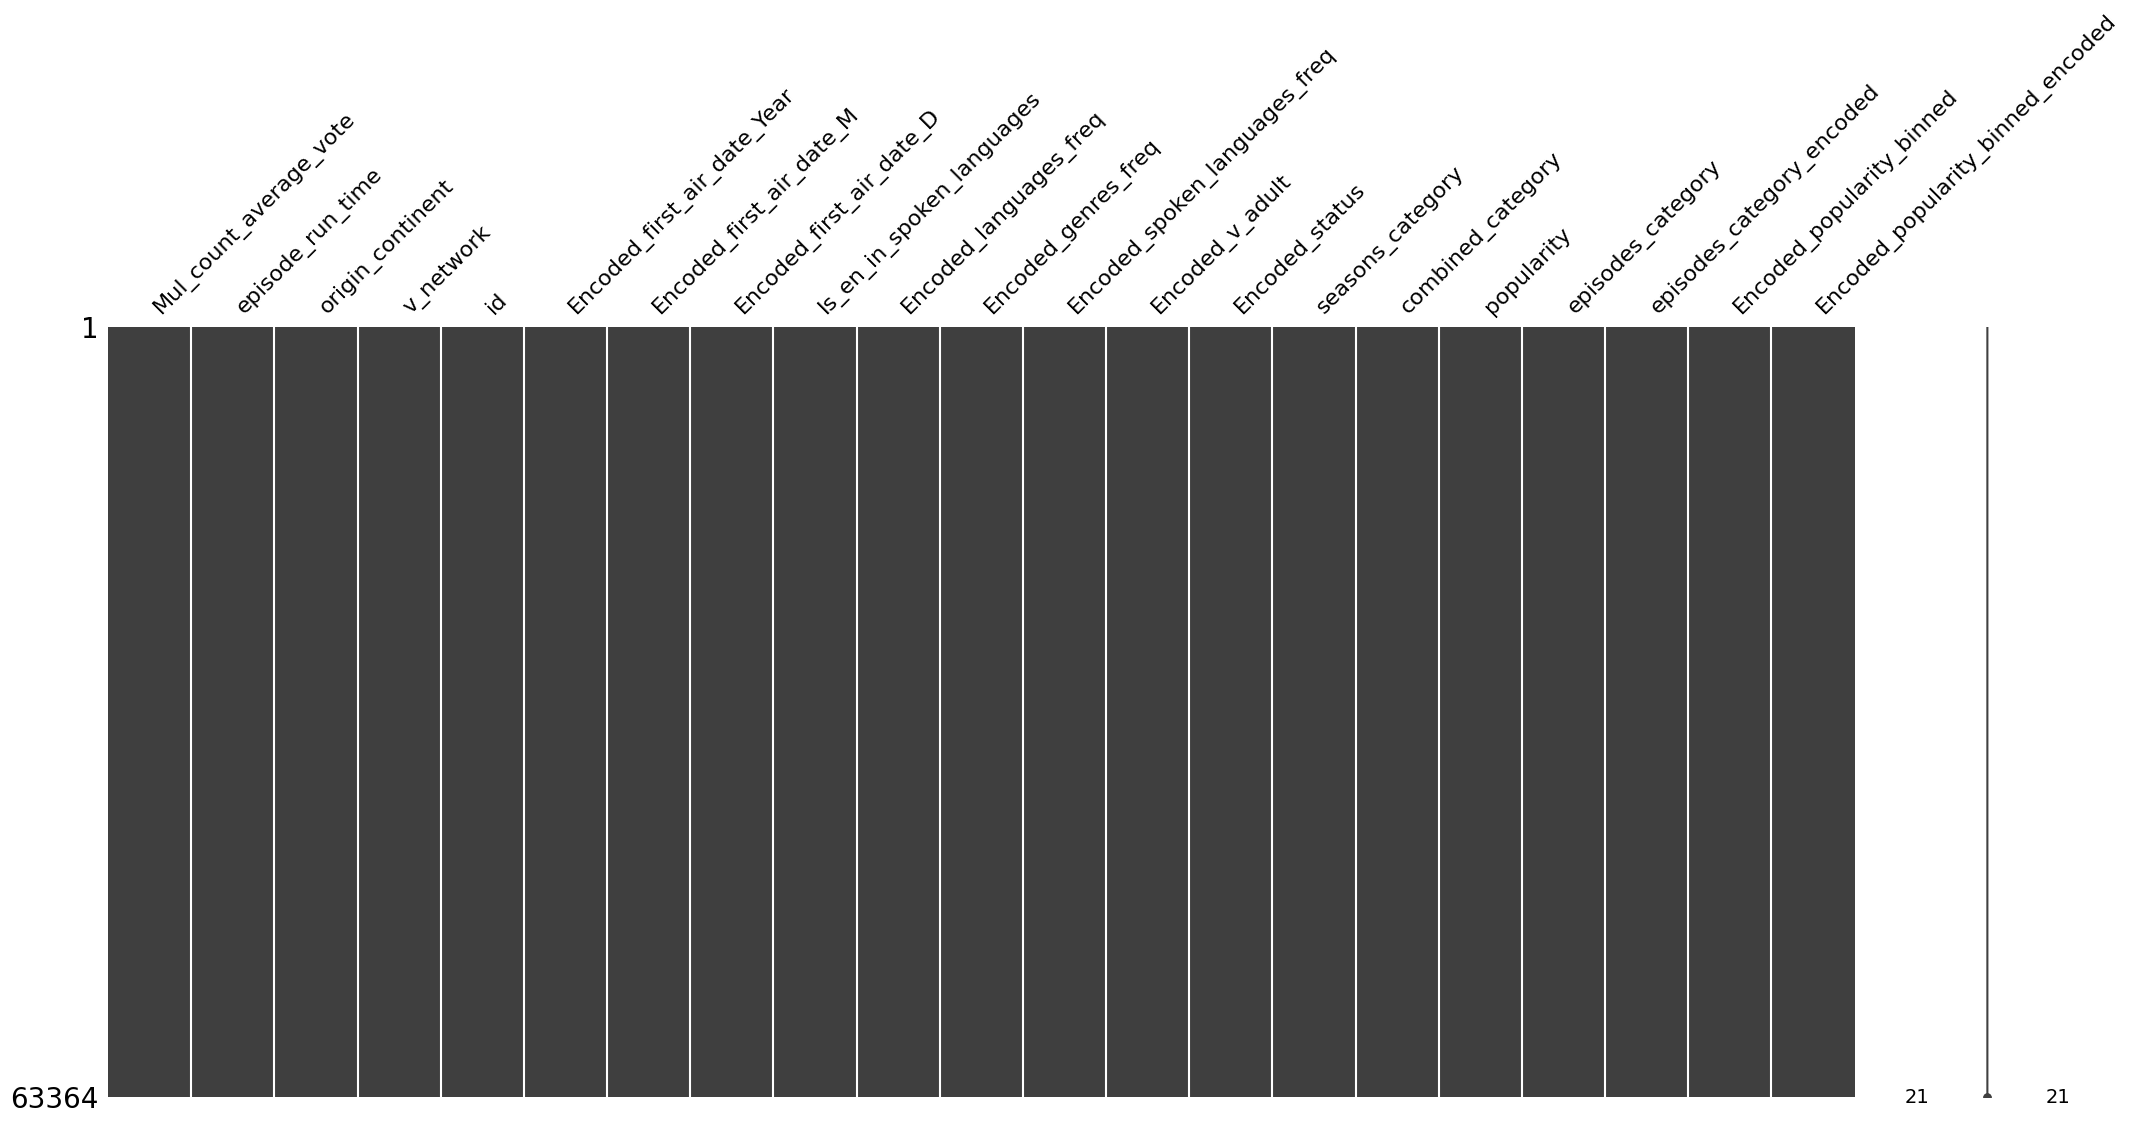

In [39]:
# The plot will display a matrix of the DataFrame, where each column is a vertical bar.
# Black (or dark) lines represent non-missing values.
# White (or light) gaps represent missing values (NaN).

import missingno as msno
msno.matrix(df)

In [40]:
print_nan_positions(df)

In [41]:
# List of row positions for the different columns
rows_episodes_category = [2184, 2405, 3080, 3440, 10746, 10812, 13382, 16926, 16946, 17697, 54720]
rows_encoded_popularity_binned = [1432]
rows_episodes_category_imputed = [2184, 2405, 3080, 3440, 10746, 10812, 13382, 16926, 16946, 17697, 54720]

# Call the function for each column
print_values_at_positions(df, 'episodes_category', rows_episodes_category)
print_values_at_positions(df, 'Encoded_popularity_binned', rows_encoded_popularity_binned)


Values from 'episodes_category':
  Row Index: 2184, Value: 0-10
  Row Index: 2405, Value: 0-10
  Row Index: 3080, Value: 0-10
  Row Index: 3440, Value: 0-10
  Row Index: 10746, Value: 0-10
  Row Index: 10812, Value: 0-10
  Row Index: 13382, Value: 0-10
  Row Index: 16926, Value: 0-10
  Row Index: 16946, Value: 0-10
  Row Index: 17697, Value: 0-10
  Row Index: 54720, Value: 0-10

Values from 'Encoded_popularity_binned':
  Row Index: 1432, Value: 0-612



Column: Mul_count_average_vote
  Zeros treated: 37955
  Negatives treated: 0
  NaNs: 0

Column: episode_run_time
  Zeros treated: 32830
  Negatives treated: 0
  NaNs: 0

Column: id
  Zeros treated: 0
  Negatives treated: 0
  NaNs: 0

Column: popularity
  Zeros treated: 0
  Negatives treated: 0
  NaNs: 0



<Axes: >

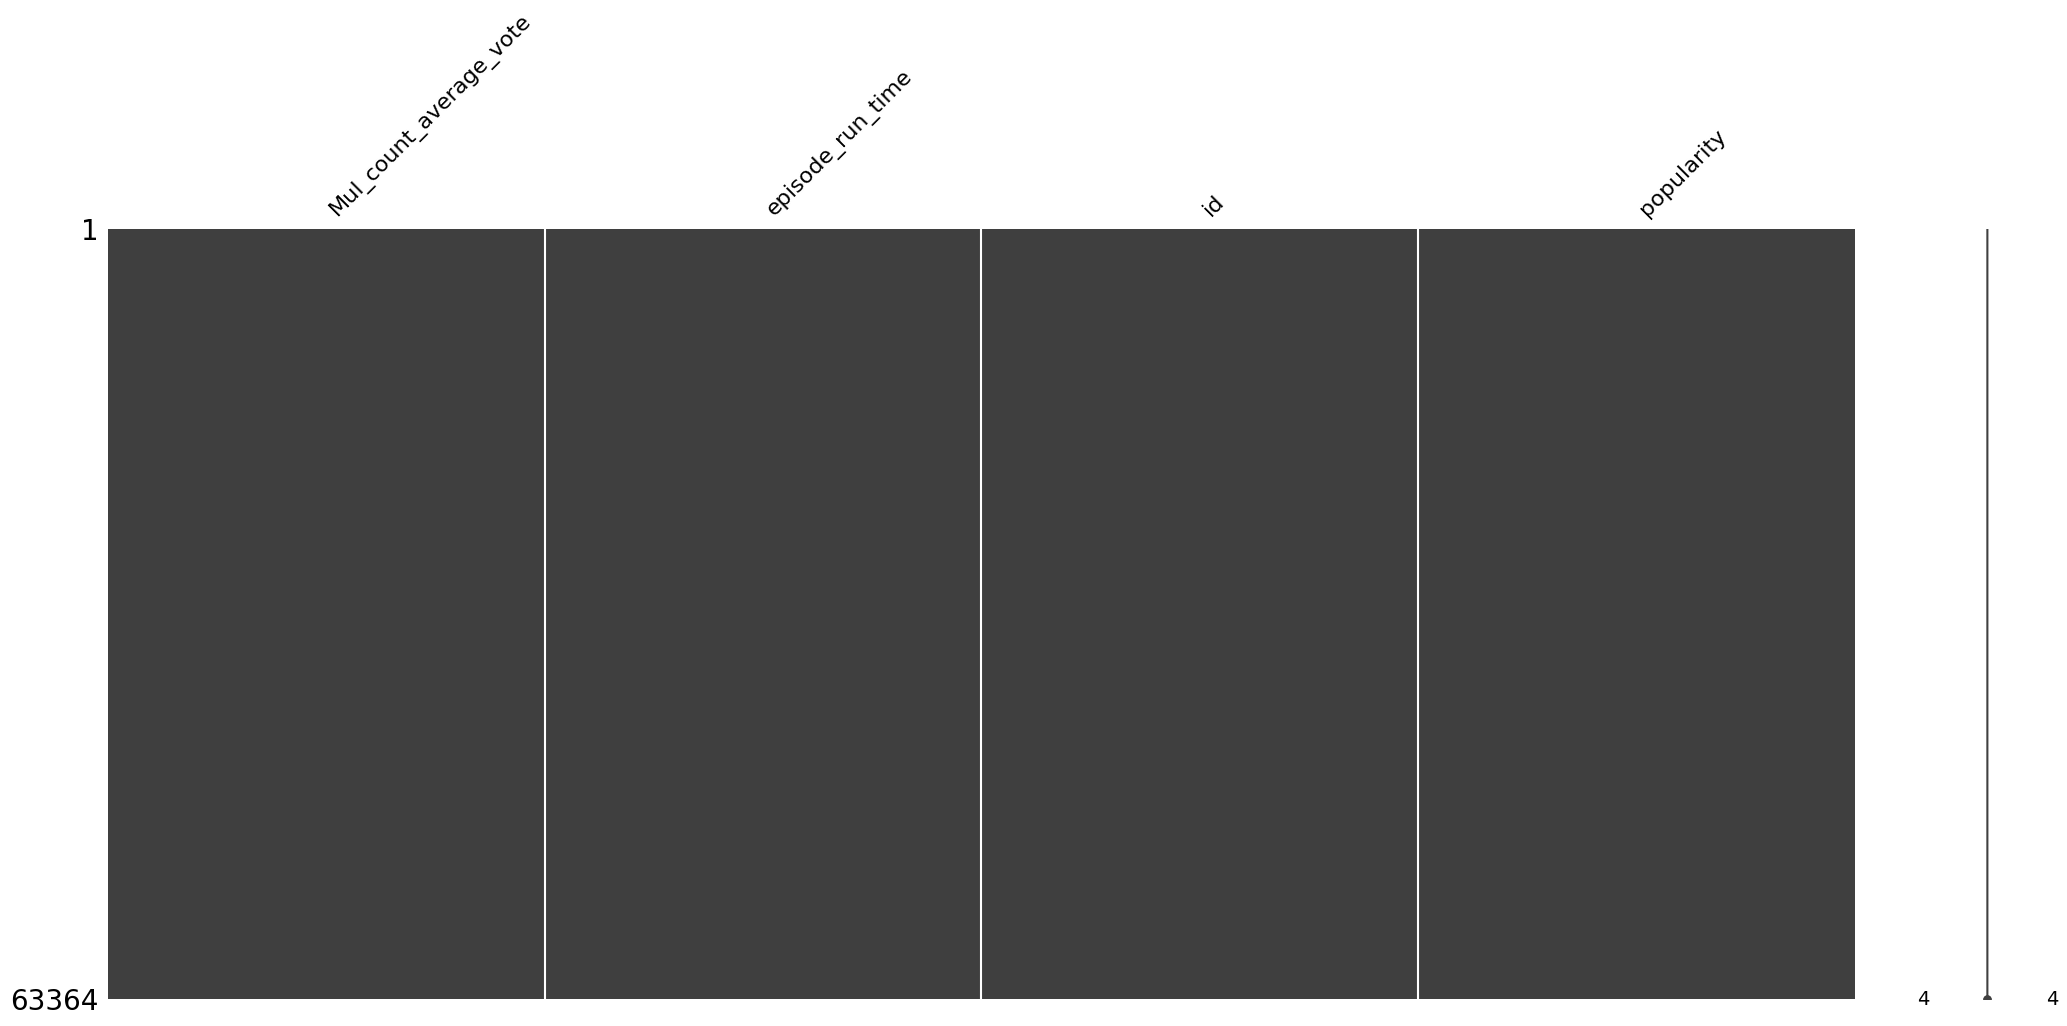

In [42]:
# Apply the function to each column and recheck

# Filter only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
recheck_and_print(numeric_df)


msno.matrix(numeric_df)

In [43]:
# import pandas as pd

# # Load the DataFrame from the CSV file
# df = pd.read_csv('ReadyFromFeatureSelect_Eng.csv')

In [44]:
# Save the modified DataFrame back to a pickle file
joblib.dump(df, 'ReadyFromFeatureSelect_Eng3_11.pkl')

['ReadyFromFeatureSelect_Eng3_11.pkl']

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63364 entries, 0 to 63363
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Mul_count_average_vote             63364 non-null  float64 
 1   episode_run_time                   63364 non-null  float64 
 2   origin_continent                   63364 non-null  category
 3   v_network                          63364 non-null  category
 4   id                                 63364 non-null  int64   
 5   Encoded_first_air_date_Year        63364 non-null  category
 6   Encoded_first_air_date_M           63364 non-null  category
 7   Encoded_first_air_date_D           63364 non-null  category
 8   Is_en_in_spoken_languages          63364 non-null  category
 9   Encoded_languages_freq             63364 non-null  category
 10  Encoded_genres_freq                63364 non-null  category
 11  Encoded_spoken_languages_freq      63364 

In [46]:
import pandas as pd
import joblib
#load from pickle 
dfload1 = joblib.load('ReadyFromFeatureSelect_Eng3_11.pkl')

In [47]:
dfload1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63364 entries, 0 to 63363
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Mul_count_average_vote             63364 non-null  float64 
 1   episode_run_time                   63364 non-null  float64 
 2   origin_continent                   63364 non-null  category
 3   v_network                          63364 non-null  category
 4   id                                 63364 non-null  int64   
 5   Encoded_first_air_date_Year        63364 non-null  category
 6   Encoded_first_air_date_M           63364 non-null  category
 7   Encoded_first_air_date_D           63364 non-null  category
 8   Is_en_in_spoken_languages          63364 non-null  category
 9   Encoded_languages_freq             63364 non-null  category
 10  Encoded_genres_freq                63364 non-null  category
 11  Encoded_spoken_languages_freq      63364 

In [48]:
# Compare the DataFrames
are_identical = df.equals(dfload1)

print("Are the DataFrames identical?", are_identical)

Are the DataFrames identical? True


In [49]:
#popularity describe
dfload1['popularity'].describe()

# count    63364.000000
# mean         1.924283
# std          1.435221
# min          1.000000
# 25%          1.000000
# 50%          1.000000
# 75%          2.400000
# max          6.000000

# In summary, the data is right-skewed with most values concentrated around the lower end (1.00), while some higher values raise the average (mean). The spread (standard deviation) is relatively large, highlighting the variability in popularity values.


# Later on i will compare the mean to the results of the model in a way of MAE and RMSE that are in the same units as popularity.

count    63364.000000
mean         1.924283
std          1.435221
min          1.000000
25%          1.000000
50%          1.000000
75%          2.400000
max          6.000000
Name: popularity, dtype: float64

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
#!pip install xgboost
import xgboost as xgb

In [51]:
models_list = pd.DataFrame()

In [ ]:
### Regression Models and Regression Metrics

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.metrics as metrics
import math
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [55]:
def regressionMetrics(y, yhat):
    res = {'MSE': metrics.mean_squared_error(y,yhat),
           'RMSE': np.sqrt(metrics.mean_squared_error(y,yhat)),
           'MAE': metrics.mean_absolute_error(y,yhat),
           'RMSLE': np.sqrt(metrics.mean_squared_log_error(y,yhat))
          }
    return res

In [ ]:
## convert to numeric

In [104]:
X = df.loc[:,df.columns != 'popularity']
y = df['popularity']

In [73]:
# Prepare the data - split the data
X_train, X_test, Y_train, Y_test = prepare_data(df, target_column='popularity')



In [81]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def handle_unknown_categories(col_train, col_test, le):
    """
    Transform column with LabelEncoder and handle unknown categories.
    Also print out details for unknown categories in the test data.

    Args:
        col_train (pd.Series or np.ndarray): Training data column to fit on.
        col_test (pd.Series or np.ndarray): Test data column to transform.
        le (LabelEncoder): Initialized LabelEncoder instance.

    Returns:
        tuple: Transformed training and test data columns.
    """
    # Fit LabelEncoder on training data
    le.fit(col_train.astype(str))

    # Transform training data
    col_train_transformed = le.transform(col_train.astype(str))

    # Prepare test data transformation
    col_test_transformed = np.full(col_test.shape, -1)
    known_classes = set(le.classes_)  # Use a set for faster lookup

    # Identify and print unknown categories
    unknown_categories = {}
    
    for i, value in enumerate(col_test.astype(str)):
        if value in known_classes:
            col_test_transformed[i] = le.transform([value])[0]
        else:
            # Print the details of unknown categories
            unknown_categories[i] = {
                'original_value': value,
                'encoded_value': -1
            }
    
    if unknown_categories:
        print("Unknown categories in test data:")
        for index, details in unknown_categories.items():
            print(f"Index: {index}, Original Value: {details['original_value']}, Encoded Value: {details['encoded_value']}")

    return col_train_transformed, col_test_transformed

# List of columns to be label encoded . due to all other are encoded  by noticed that prefix of its column name.
# my_list = ['Is_en_in_spoken_languages', 'seasons_category', 'episodes_category', 'Encoded_popularity_binned', 'combined_category']

# List of columns that are categorical
my_list = [col for col in df.columns if df[col].dtype == 'object' or df[col].dtype.name == 'category']


# Initialize LabelEncoder dictionary
le_dict = {}

# Check columns in X_train and X_test
print("Columns in X_train:", X_train.columns.tolist())
print("Columns in X_test:", X_test.columns.tolist())

# Ensure only columns present in both train and test are processed
valid_columns = [col for col in my_list if col in X_train.columns and col in X_test.columns]

if not valid_columns:
    raise ValueError("No valid columns found in both X_train and X_test")

# Apply LabelEncoder to each column in the valid list
for column in valid_columns:
    # Initialize LabelEncoder for this column
    le = LabelEncoder()
    
    # Handle unknown categories and transform columns
    X_train[column], X_test[column] = handle_unknown_categories(
        X_train[column], X_test[column], le)
    
    # Store the LabelEncoder in the dictionary
    le_dict[column] = le

# Check the transformations
print(X_train[valid_columns].head())
print(X_test[valid_columns].head())


Columns in X_train: ['Mul_count_average_vote', 'episode_run_time', 'origin_continent', 'v_network', 'id', 'Encoded_first_air_date_Year', 'Encoded_first_air_date_M', 'Encoded_first_air_date_D', 'Is_en_in_spoken_languages', 'Encoded_languages_freq', 'Encoded_genres_freq', 'Encoded_spoken_languages_freq', 'Encoded_v_adult', 'Encoded_status', 'seasons_category', 'combined_category', 'episodes_category', 'episodes_category_encoded', 'Encoded_popularity_binned', 'Encoded_popularity_binned_encoded']
Columns in X_test: ['Mul_count_average_vote', 'episode_run_time', 'origin_continent', 'v_network', 'id', 'Encoded_first_air_date_Year', 'Encoded_first_air_date_M', 'Encoded_first_air_date_D', 'Is_en_in_spoken_languages', 'Encoded_languages_freq', 'Encoded_genres_freq', 'Encoded_spoken_languages_freq', 'Encoded_v_adult', 'Encoded_status', 'seasons_category', 'combined_category', 'episodes_category', 'episodes_category_encoded', 'Encoded_popularity_binned', 'Encoded_popularity_binned_encoded']
     

In [82]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50691 entries, 1818 to 56422
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Mul_count_average_vote             50691 non-null  float64
 1   episode_run_time                   50691 non-null  float64
 2   origin_continent                   50691 non-null  int64  
 3   v_network                          50691 non-null  int64  
 4   id                                 50691 non-null  int64  
 5   Encoded_first_air_date_Year        50691 non-null  int64  
 6   Encoded_first_air_date_M           50691 non-null  int64  
 7   Encoded_first_air_date_D           50691 non-null  int64  
 8   Is_en_in_spoken_languages          50691 non-null  int64  
 9   Encoded_languages_freq             50691 non-null  int64  
 10  Encoded_genres_freq                50691 non-null  int64  
 11  Encoded_spoken_languages_freq      50691 non-null  int64

In [83]:
print(X_test.dtypes)  # Check data types after conversion

Mul_count_average_vote               float64
episode_run_time                     float64
origin_continent                       int64
v_network                              int64
id                                     int64
Encoded_first_air_date_Year            int64
Encoded_first_air_date_M               int64
Encoded_first_air_date_D               int64
Is_en_in_spoken_languages              int64
Encoded_languages_freq                 int64
Encoded_genres_freq                    int64
Encoded_spoken_languages_freq          int64
Encoded_v_adult                        int64
Encoded_status                         int64
seasons_category                       int64
combined_category                      int64
episodes_category                      int64
episodes_category_encoded              int64
Encoded_popularity_binned              int64
Encoded_popularity_binned_encoded      int64
dtype: object


In [84]:
print(X_train.dtypes)  # Check data types after conversion

Mul_count_average_vote               float64
episode_run_time                     float64
origin_continent                       int64
v_network                              int64
id                                     int64
Encoded_first_air_date_Year            int64
Encoded_first_air_date_M               int64
Encoded_first_air_date_D               int64
Is_en_in_spoken_languages              int64
Encoded_languages_freq                 int64
Encoded_genres_freq                    int64
Encoded_spoken_languages_freq          int64
Encoded_v_adult                        int64
Encoded_status                         int64
seasons_category                       int64
combined_category                      int64
episodes_category                      int64
episodes_category_encoded              int64
Encoded_popularity_binned              int64
Encoded_popularity_binned_encoded      int64
dtype: object


In [85]:
### Linear Regression

In [86]:
mod1 = LinearRegression()
mod1.fit(X_train,Y_train)




LinearRegression()

In [87]:
pred1 = mod1.predict(X_test)
pred1 = np.maximum(pred1, 0)  # Set negative predictions to zero

In [98]:
regressionMetrics(Y_test, pred1)

{'MSE': np.float64(1.4234010124803835),
 'RMSE': np.float64(1.1930637084751106),
 'MAE': np.float64(0.8913621796284957),
 'RMSLE': np.float64(0.35075294057230016)}

In [93]:
model_dict = {'model': "Linear Regression"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(Y_test, pred1)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,1.423401,1.193064,0.891362,0.350753


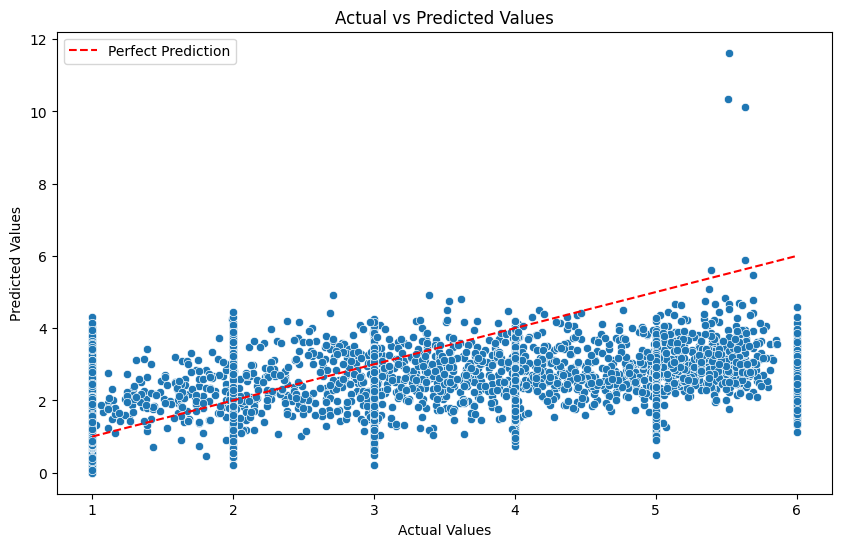

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming X_test and pred1 are of the same length and aligned
# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Actual': Y_test,
    'Predicted': pred1
})
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=plot_data)

# Plot a line for the perfect prediction
plt.plot([plot_data['Actual'].min(), plot_data['Actual'].max()],
         [plot_data['Actual'].min(), plot_data['Actual'].max()],
         'r--', label='Perfect Prediction')

# Add titles and labels
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

In [ ]:
### Decision Tree

In [107]:
mod2 = DecisionTreeRegressor(random_state=1)
mod2.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=1)

In [108]:
pred2 = mod2.predict(X_test)
model_dict = {'model': "Decision Tree"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(Y_test, pred2)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)


,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,1.423401,1.193064,0.891362,0.350753
1,Decision Tree,1.324307,1.150785,0.615313,0.327885
2,Decision Tree,1.324307,1.150785,0.615313,0.327885
3,Decision Tree,1.324307,1.150785,0.615313,0.327885
4,Decision Tree,1.324307,1.150785,0.615313,0.327885


In [111]:
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,1.423401,1.193064,0.891362,0.350753
1,Decision Tree,1.324307,1.150785,0.615313,0.327885


In [ ]:
### Random Forest


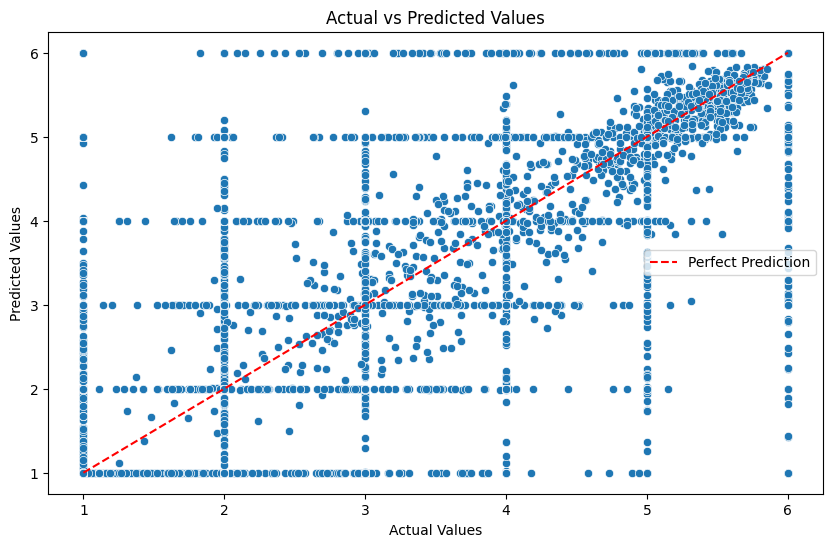

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming X_test and pred1 are of the same length and aligned
# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Actual': Y_test,
    'Predicted': pred2
})
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=plot_data)

# Plot a line for the perfect prediction
plt.plot([plot_data['Actual'].min(), plot_data['Actual'].max()],
         [plot_data['Actual'].min(), plot_data['Actual'].max()],
         'r--', label='Perfect Prediction')

# Add titles and labels
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

In [114]:
mod3 = RandomForestRegressor(random_state=1)
mod3.fit(X_train,Y_train)


RandomForestRegressor(random_state=1)

In [116]:
pred3 = mod3.predict(X_test)
model_dict = {'model': "RandomForest"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(Y_test, pred3)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,1.423401,1.193064,0.891362,0.350753
1,Decision Tree,1.324307,1.150785,0.615313,0.327885
2,RandomForest,0.666497,0.816393,0.494151,0.242109


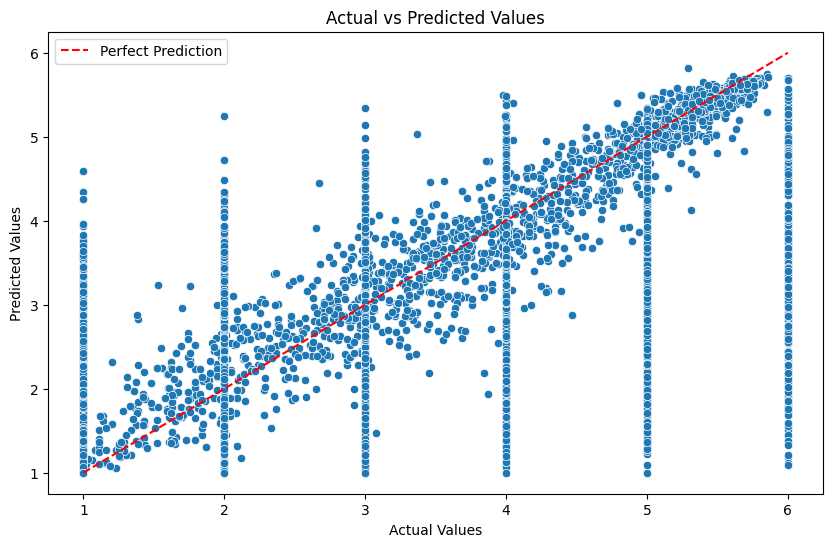

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming X_test and pred1 are of the same length and aligned
# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Actual': Y_test,
    'Predicted': pred3
})
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=plot_data)

# Plot a line for the perfect prediction
plt.plot([plot_data['Actual'].min(), plot_data['Actual'].max()],
         [plot_data['Actual'].min(), plot_data['Actual'].max()],
         'r--', label='Perfect Prediction')

# Add titles and labels
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

In [ ]:
### Gradient Boosting Machine (GBM)

In [123]:
mod4 = GradientBoostingRegressor(random_state=1)
mod4.fit(X_train,Y_train)

GradientBoostingRegressor(random_state=1)

In [ ]:
pred4 = mod4.predict(X_test)
model_dict = {'model': "GBM"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(Y_test, pred4)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)

In [126]:
models_list


,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,1.423401,1.193064,0.891362,0.350753
1,Decision Tree,1.324307,1.150785,0.615313,0.327885
2,RandomForest,0.666497,0.816393,0.494151,0.242109
3,GBM,0.691303,0.831446,0.534107,0.243581
4,ADABoost,0.666497,0.816393,0.494151,0.242109


In [118]:
### Adaptive Boosting (ADABoost)


In [119]:
mod5 = AdaBoostRegressor(random_state=1)
mod5.fit(X_train,Y_train)


AdaBoostRegressor(random_state=1)

In [121]:
pred5 = mod5.predict(X_test)
model_dict = {'model': "ADABoost"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(Y_test, pred3)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list



,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,1.423401,1.193064,0.891362,0.350753
1,Decision Tree,1.324307,1.150785,0.615313,0.327885
2,RandomForest,0.666497,0.816393,0.494151,0.242109
3,ADABoost,0.666497,0.816393,0.494151,0.242109


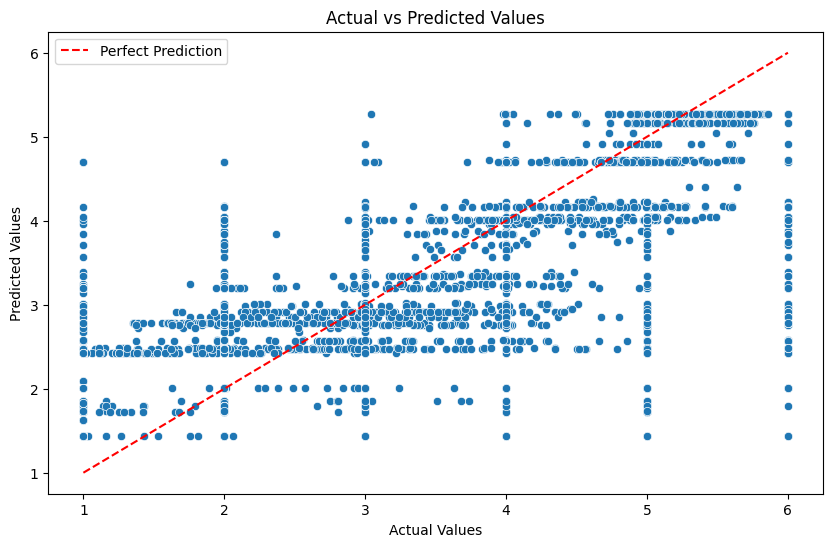

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming X_test and pred1 are of the same length and aligned
# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Actual': Y_test,
    'Predicted': pred5
})
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=plot_data)

# Plot a line for the perfect prediction
plt.plot([plot_data['Actual'].min(), plot_data['Actual'].max()],
         [plot_data['Actual'].min(), plot_data['Actual'].max()],
         'r--', label='Perfect Prediction')

# Add titles and labels
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

In [ ]:
### Support Vector Machine (SVM)

In [127]:
mod6 = SVR()
mod6.fit(X_train,Y_train)

SVR()

In [128]:
pred6 = mod6.predict(X_test)
model_dict = {'model': "SVM"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(Y_test, pred6)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list


,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,1.423401,1.193064,0.891362,0.350753
1,Decision Tree,1.324307,1.150785,0.615313,0.327885
2,RandomForest,0.666497,0.816393,0.494151,0.242109
3,GBM,0.691303,0.831446,0.534107,0.243581
4,ADABoost,0.666497,0.816393,0.494151,0.242109
5,SVM,2.324139,1.524513,0.924442,0.426264


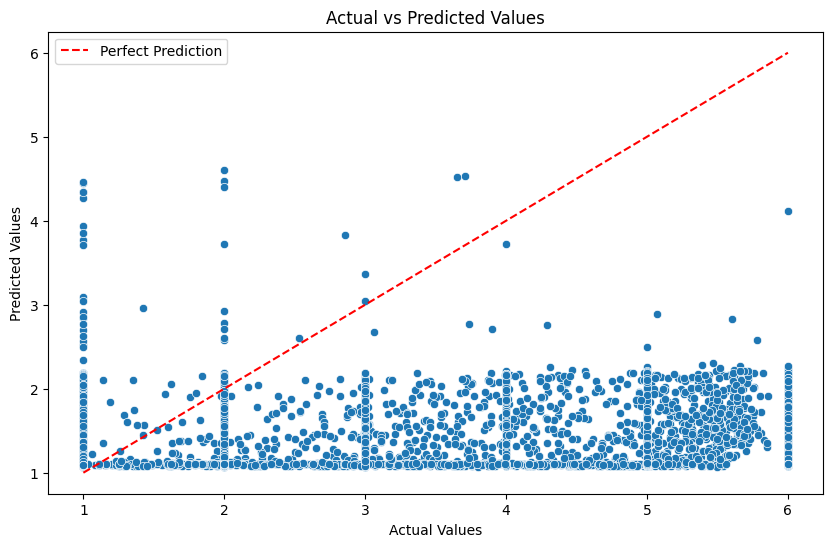

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming X_test and pred1 are of the same length and aligned
# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Actual': Y_test,
    'Predicted': pred6
})
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=plot_data)

# Plot a line for the perfect prediction
plt.plot([plot_data['Actual'].min(), plot_data['Actual'].max()],
         [plot_data['Actual'].min(), plot_data['Actual'].max()],
         'r--', label='Perfect Prediction')

# Add titles and labels
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

In [ ]:
# XGBoost Regressor


In [130]:
mod7= xgb.XGBRegressor()
mod7.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [131]:
pred7 = mod7.predict(X_test)
model_dict = {'model': "XGB"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(Y_test, pred7)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,1.423401,1.193064,0.891362,0.350753
1,Decision Tree,1.324307,1.150785,0.615313,0.327885
2,RandomForest,0.666497,0.816393,0.494151,0.242109
3,GBM,0.691303,0.831446,0.534107,0.243581
4,ADABoost,0.666497,0.816393,0.494151,0.242109
5,SVM,2.324139,1.524513,0.924442,0.426264
6,XGB,0.650208,0.806355,0.493921,0.235448


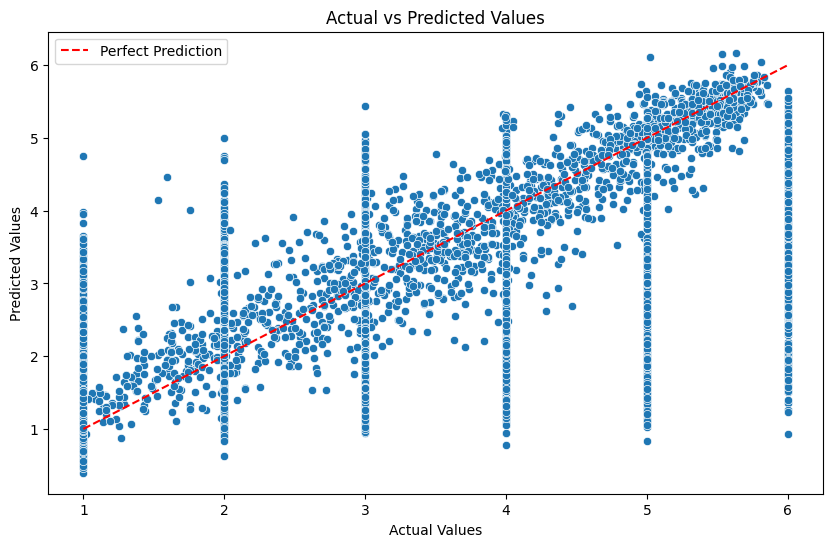

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming X_test and pred1 are of the same length and aligned
# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Actual': Y_test,
    'Predicted': pred7
})
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=plot_data)

# Plot a line for the perfect prediction
plt.plot([plot_data['Actual'].min(), plot_data['Actual'].max()],
         [plot_data['Actual'].min(), plot_data['Actual'].max()],
         'r--', label='Perfect Prediction')

# Add titles and labels
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

# Show the plot
plt.show()

In [ ]:
## selection based on this path

In [133]:
models_list.sort_values('MAE')

,model,MSE,RMSE,MAE,RMSLE
6,XGB,0.650208,0.806355,0.493921,0.235448
2,RandomForest,0.666497,0.816393,0.494151,0.242109
4,ADABoost,0.666497,0.816393,0.494151,0.242109
3,GBM,0.691303,0.831446,0.534107,0.243581
1,Decision Tree,1.324307,1.150785,0.615313,0.327885
0,Linear Regression,1.423401,1.193064,0.891362,0.350753
5,SVM,2.324139,1.524513,0.924442,0.426264


In [134]:
models_list.sort_values('RMSE')

,model,MSE,RMSE,MAE,RMSLE
6,XGB,0.650208,0.806355,0.493921,0.235448
2,RandomForest,0.666497,0.816393,0.494151,0.242109
4,ADABoost,0.666497,0.816393,0.494151,0.242109
3,GBM,0.691303,0.831446,0.534107,0.243581
1,Decision Tree,1.324307,1.150785,0.615313,0.327885
0,Linear Regression,1.423401,1.193064,0.891362,0.350753
5,SVM,2.324139,1.524513,0.924442,0.426264


In [ ]:
                        ### second way  ####

In [28]:
dfload1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63364 entries, 0 to 63363
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Mul_count_average_vote             63364 non-null  float64 
 1   episode_run_time                   63364 non-null  float64 
 2   origin_continent                   63364 non-null  category
 3   v_network                          63364 non-null  category
 4   id                                 63364 non-null  int64   
 5   Encoded_first_air_date_Year        63364 non-null  category
 6   Encoded_first_air_date_M           63364 non-null  category
 7   Encoded_first_air_date_D           63364 non-null  category
 8   Is_en_in_spoken_languages          63364 non-null  category
 9   Encoded_languages_freq             63364 non-null  category
 10  Encoded_genres_freq                63364 non-null  category
 11  Encoded_spoken_languages_freq      63364 

In [29]:
# Summary:
# Prepare Data: Split the DataFrame into training and test sets.
# Define Models: Specify the models you want to train.
# Fit Models: Train each model on the training data.
# Parallel Processing: Use parallel processing to train multiple models simultaneously.
# Add to Dictionary: Store each trained model in a dictionary.
# Evaluate and Save: Optionally, evaluate and save the models for later use.



#note: To split your data into training, testing (development),
# and validation sets while ensuring proper handling of ordinal and categorical features, you can follow these steps in Python:
# X will include all features except the target (popularity).
# y will be the target column (popularity).




In [30]:
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # Define your columns

# # Define preprocessing for categorical and numeric features
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), numeric_features),
#         ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
#     ])

# # Define model
# model = RandomForestClassifier()

# # Create a pipeline
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('model', model)
# ])

# # Split the data
# X = dfload1.drop(columns=['popularity'])
# y = dfload1['popularity']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train the model
# pipeline.fit(X_train, y_train)

# # Predict and evaluate
# y_pred = pipeline.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Model accuracy: {accuracy:.2f}")

In [31]:
# Prepare the data
X_train, X_test, Y_train, Y_test = prepare_data(dfload1, target_column='popularity')



# Define the models
models = define_models()


In [32]:
# Applying LabelEncoder to specific columns is a strategic choice based on the nature of the data and the needs of the model

from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# my_list = ['Is_en_in_spoken_languages', 'seasons_category', 'episodes_category', 'Encoded_popularity_binned', 'combined_category', 'episodes_category_imputed']

# # Apply LabelEncoder to each column in the list
# X_train[my_list] = X_train[my_list].apply(lambda col: le.fit_transform(col))
# Columns to be label encoded
# Columns to be label encoded
my_list = ['Is_en_in_spoken_languages', 'seasons_category', 'episodes_category', 'Encoded_popularity_binned', 'combined_category']

# Initialize LabelEncoder
le_dict = {}  # Dictionary to store LabelEncoders for each column

def handle_unknown_categories(col_train, col_test, le):
    """
    Transform column with LabelEncoder and handle unknown categories.
    """
    # Fit LabelEncoder on training data
    le.fit(col_train.astype(str))
    
    # Create a default category for unknown values
    if le.classes_.size == 0:
        le.classes_ = np.append(le.classes_, 'unknown')
    
    # Transform training data
    col_train_transformed = le.transform(col_train.astype(str))
    
    # Handle unknown categories in test data
    col_test_transformed = np.full(col_test.shape, -1)
    for i, value in enumerate(col_test.astype(str)):
        if value in le.classes_:
            col_test_transformed[i] = le.transform([value])[0]
    
    return col_train_transformed, col_test_transformed

# Apply LabelEncoder to each column in the list individually
for column in my_list:
    # Check if the column exists in the DataFrame
    if column in X_train.columns:
        # Initialize LabelEncoder for this column
        le = LabelEncoder()
        
        # Handle unknown categories and transform columns
        X_train[column], X_test[column] = handle_unknown_categories(
            X_train[column], X_test[column], le)
        
        # Store the LabelEncoder in the dictionary
        le_dict[column] = le
    else:
        print(f"[DEBUG] Column {column} not found in X_train")

# Check the transformations
print(X_train[my_list].head())
print(X_test[my_list].head())

       Is_en_in_spoken_languages  seasons_category  episodes_category  \
1818                           0                 0                  0   
38009                          0                 0                  0   
48465                          0                 0                  0   
35888                          0                 0                  0   
15959                          1                 0                  0   

       Encoded_popularity_binned  combined_category  
1818                           0                  0  
38009                          0                  0  
48465                          0                  0  
35888                          0                  0  
15959                          0                  0  
       Is_en_in_spoken_languages  seasons_category  episodes_category  \
55650                          0                 0                  1   
29702                          0                 0                  0   
48916             

In [33]:
print(X_train.dtypes)
print(X_train.head())




Mul_count_average_vote                float64
episode_run_time                      float64
origin_continent                     category
v_network                            category
id                                      int64
Encoded_first_air_date_Year          category
Encoded_first_air_date_M             category
Encoded_first_air_date_D             category
Is_en_in_spoken_languages               int64
Encoded_languages_freq               category
Encoded_genres_freq                  category
Encoded_spoken_languages_freq        category
Encoded_v_adult                      category
Encoded_status                       category
seasons_category                        int64
combined_category                       int64
episodes_category                       int64
episodes_category_encoded            category
Encoded_popularity_binned               int64
Encoded_popularity_binned_encoded    category
dtype: object
       Mul_count_average_vote  episode_run_time origin_continent v

In [34]:

# Train the models in parallel
fitted_models_dict = train_models_in_parallel(models, X_train, Y_train)



Models dictionary:
Model Name: RandomForest
Model Instance: RandomForestRegressor()

Model Name: LinearRegression
Model Instance: LinearRegression()

Model Name: SVR
Model Instance: SVR()

Model Name: GradientBoosting
Model Instance: GradientBoostingRegressor()

Model Name: DecisionTree
Model Instance: DecisionTreeRegressor()



In [35]:

# Add models to a dictionary
all_trained_models = {}
for model_name, model in fitted_models_dict.items():
    all_trained_models = add_model_to_dict(all_trained_models, model_name, model)


In [36]:
all_trained_models

{'RandomForest': RandomForestRegressor(),
 'LinearRegression': LinearRegression(),
 'SVR': SVR(),
 'GradientBoosting': GradientBoostingRegressor(),
 'DecisionTree': DecisionTreeRegressor()}

In [37]:
# Import the evaluate_and_save_models function from your module
# from your_module import evaluate_and_save_models

# Evaluate the models (assuming the target is categorical)
results_df = evaluate_and_save_models(all_trained_models, X_test, Y_test, target_type='continuous', save_path='models')

# The results will be displayed in a DataFrame
print(results_df)

Evaluating model: RandomForest
X_test types:
Mul_count_average_vote               float64
episode_run_time                     float64
origin_continent                     float64
v_network                            float64
id                                     int64
Encoded_first_air_date_Year            int64
Encoded_first_air_date_M               int64
Encoded_first_air_date_D               int64
Is_en_in_spoken_languages              int64
Encoded_languages_freq                 int64
Encoded_genres_freq                    int64
Encoded_spoken_languages_freq          int64
Encoded_v_adult                        int64
Encoded_status                         int64
seasons_category                       int64
combined_category                      int64
episodes_category                      int64
episodes_category_encoded              int64
Encoded_popularity_binned              int64
Encoded_popularity_binned_encoded      int64
dtype: object
Model: RandomForest
Mean Squared Error (M

In [ ]:
# To determine the best model based on the metrics provided (MAE, MSE, RMSE, and R²), you can evaluate each model's performance in terms of these metrics. Here’s how to interpret each metric:

# MAE (Mean Absolute Error): Lower values are better. It represents the average magnitude of errors in predictions without considering their direction.
# MSE (Mean Squared Error): Lower values are better. It gives more weight to large errors due to squaring.
# RMSE (Root Mean Squared Error): Lower values are better. It’s the square root of MSE and provides an error measure in the same units as the target variable.
# R² (Coefficient of Determination): Higher values are better. It indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. The maximum value is 1.

In [ ]:
# Best Model Based on Metrics:
# MAE (Best: RandomForest): RandomForest has the lowest MAE, indicating it has the smallest average error in predictions.

# MSE (Best: RandomForest): RandomForest also has the lowest MSE, suggesting it has the smallest average squared error.

# RMSE (Best: RandomForest): RandomForest has the lowest RMSE, meaning it has the smallest average magnitude of error in the same units as the target variable.

# R² (Best: RandomForest): RandomForest has the highest R² value, indicating it explains the most variance in the target variable.

# Conclusion
# The RandomForest model is the best according to all the metrics: it has the lowest MAE, MSE, and RMSE, and the highest R² value. This suggests that RandomForest performs the best in terms of both error magnitude and the proportion of variance explained by the model.

In [107]:
#END Function

In [135]:
# Save the modified DataFrame back to a pickle file
joblib.dump(dfload1, 'ReadyFromFeatureSelect_Eng.pkl')

['ReadyFromFeatureSelect_Eng.pkl']

In [136]:
# Save the modified DataFrame back to a pickle file
joblib.dump(df, 'ReadyFromFeatureSelect_Eng1.pkl')

['ReadyFromFeatureSelect_Eng1.pkl']

In [ ]:
### compare the 2 methods ###


In [ ]:
# Your Results:
# Model	MAE	MSE	RMSE	R²
# RandomForest	0.490386	0.655953	0.809909	0.676376
# LinearRegression	0.883400	1.384724	1.176743	0.316826
# SVR	0.834578	1.703488	1.305177	0.159559
# GradientBoosting	0.524190	0.679251	0.824167	0.664881
# DecisionTree	0.612176	1.304673	1.142223	0.356320
# Friend's Results:
# Model	MSE	RMSE	MAE	RMSLE
# XGB	0.650208	0.806355	0.493921	0.235448
# RandomForest	0.666497	0.816393	0.494151	0.242109
# ADABoost	0.666497	0.816393	0.494151	0.242109
# GBM	0.691303	0.831446	0.534107	0.243581
# Decision Tree	1.324307	1.150785	0.615313	0.327885
# Linear Regression	1.423401	1.193064	0.891362	0.350753
# SVM	2.324139	1.524513	0.924442	0.426264
# Comparison:
# RandomForest:

# Your results: MSE = 0.655953, RMSE = 0.809909, MAE = 0.490386
# Friend's results: MSE = 0.666497, RMSE = 0.816393, MAE = 0.494151
# Comparison: Both results are similar, with very close MSE, RMSE, and MAE values, suggesting that the RandomForest model performs similarly in both cases.

# Decision Tree:

# Your results: MSE = 1.304673, RMSE = 1.142223, MAE = 0.612176
# Friend's results: MSE = 1.324307, RMSE = 1.150785, MAE = 0.615313
# Comparison: The Decision Tree model results are quite close, with minor differences in MSE, RMSE, and MAE values.

# Linear Regression:

# Your results: MSE = 1.384724, RMSE = 1.176743, MAE = 0.883400
# Friend's results: MSE = 1.423401, RMSE = 1.193064, MAE = 0.891362

In [ ]:
# In your case, RandomForest and GradientBoosting perform better with lower MAE and RMSE values compared to the mean of

In [ ]:
###  Finetuning Random Forest - due to the best model is Random Forest i choose to improve it up to 5%
# random search, grid search  - i selected with grid search

# Grid Search: Exhaustively evaluates all hyperparameter combinations.
# Grid Search: Exhaustively evaluates all hyperparameter combinations. The quality of the result depends on the range and granularity of hyperparameters.
# Random Search: Samples random hyperparameter combinations for efficiency. The quality of the result depends on the number of samples.

In [137]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
}

# Create a base model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)
#Verbose - level of details that will be provided in each iteration
# Fit the grid search to the data

grid_search.fit(X_train, Y_train)

# Grid search should be performed on the training data. 
# This process involves using cross-validation on the training set to find the best hyperparameters. The test data should only be used for the final evaluation to ensure an unbiased assessment of the model’s performance.

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


C:\Users\DELL\AppData\Local\pypoetry\Cache\virtualenvs\myproject311-FLp0U2UR-py3.11\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
648 fits failed out of a total of 1944.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
395 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\AppData\Local\pypoetry\Cache\virtualenvs\myproject311-FLp0U2UR-py3.11\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\AppData\Local\pypoetry\Cache\virtualenvs\myproject311-FLp0U2UR-py3.11\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  Fil

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=2)

In [138]:
# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: -0.6726879621357451


In [ ]:
# second try 

In [140]:
grid_search = GridSearchCV(estimator=mod7, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (MSE):", -grid_search.best_score_)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score (MSE): 0.6716248623558121


C:\Users\DELL\AppData\Local\pypoetry\Cache\virtualenvs\myproject311-FLp0U2UR-py3.11\Lib\site-packages\xgboost\core.py:158: UserWarning: [05:39:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


In [141]:
pred8 = grid_search.predict(X_test)
model_dict = {'model': "XGB_FT"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(Y_test, pred8)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,1.423401,1.193064,0.891362,0.350753
1,Decision Tree,1.324307,1.150785,0.615313,0.327885
2,RandomForest,0.666497,0.816393,0.494151,0.242109
3,GBM,0.691303,0.831446,0.534107,0.243581
4,ADABoost,0.666497,0.816393,0.494151,0.242109
5,SVM,2.324139,1.524513,0.924442,0.426264
6,XGB,0.650208,0.806355,0.493921,0.235448
7,XGB_FT,0.641870,0.801168,0.489824,0.233579


In [142]:
grid_search1 = GridSearchCV(estimator=mod3, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search1.fit(X_train, Y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (MSE):", -grid_search.best_score_)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


C:\Users\DELL\AppData\Local\pypoetry\Cache\virtualenvs\myproject311-FLp0U2UR-py3.11\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
648 fits failed out of a total of 1944.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
556 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\AppData\Local\pypoetry\Cache\virtualenvs\myproject311-FLp0U2UR-py3.11\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\AppData\Local\pypoetry\Cache\virtualenvs\myproject311-FLp0U2UR-py3.11\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  Fil

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Score (MSE): 0.6759193766818464


In [143]:
pred9 = grid_search1.predict(X_test)
model_dict = {'model': "RandomForest_FT"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(Y_test, pred9)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,1.423401,1.193064,0.891362,0.350753
1,Decision Tree,1.324307,1.150785,0.615313,0.327885
2,RandomForest,0.666497,0.816393,0.494151,0.242109
3,GBM,0.691303,0.831446,0.534107,0.243581
4,ADABoost,0.666497,0.816393,0.494151,0.242109
5,SVM,2.324139,1.524513,0.924442,0.426264
6,XGB,0.650208,0.806355,0.493921,0.235448
7,XGB_FT,0.641870,0.801168,0.489824,0.233579
8,RandomForest_FT,0.646449,0.804021,0.500134,0.234905


In [144]:
joblib.dump(df, 'FinalObject_Modelsindirectory.pkl')

['FinalObject_Modelsindirectory.pkl']

In [145]:
# Mean value of the "popularity" column
mean_popularity = 1.924283

# New row with MAE equal to the mean value of popularity
new_row = {
    'model': 'Baseline (Mean MAE)',
    'MSE': None,  # Assuming you don't have MSE for this baseline
    'RMSE': None,  # Assuming you don't have RMSE for this baseline
    'MAE': mean_popularity,  # Mean value of popularity
    'RMSLE': None  # Assuming you don't have RMSLE for this baseline
}

# Convert the new row to a DataFrame
new_row_df = pd.DataFrame([new_row])

# Concatenate the new row to the existing DataFrame
models_list = pd.concat([models_list, new_row_df], ignore_index=True)

print(models_list)

                 model       MSE      RMSE       MAE     RMSLE
0    Linear Regression  1.423401  1.193064  0.891362  0.350753
1        Decision Tree  1.324307  1.150785  0.615313  0.327885
2         RandomForest  0.666497  0.816393  0.494151  0.242109
3                  GBM  0.691303  0.831446  0.534107  0.243581
4             ADABoost  0.666497  0.816393  0.494151  0.242109
5                  SVM  2.324139  1.524513  0.924442  0.426264
6                  XGB  0.650208  0.806355  0.493921  0.235448
7               XGB_FT  0.641870  0.801168  0.489824  0.233579
8      RandomForest_FT  0.646449  0.804021  0.500134  0.234905
9  Baseline (Mean MAE)       NaN       NaN  1.924283       NaN
